In [1]:
import os
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd

In [2]:
scriptoutputs = [f for f in os.listdir() if f.startswith("startup_script_")]
scriptoutputs.sort()
filename = scriptoutputs[-1]
filename

'startup_script_20190527154944'

In [3]:
alldata = pd.read_csv(filename, sep=" ", header=None, names=["program", "real", "user", "kernel"])

In [4]:
data = alldata.groupby("program").mean()
data["on_proc"] = data["user"] + data["kernel"]
data = data.sort_values("on_proc")
data

,real,user,kernel,on_proc
program,,,,
lua,0.001000,0.000933,0.000067,0.001000
perl,0.001067,0.001000,0.000133,0.001133
sbcl,0.004067,0.001867,0.002200,0.004067
bash,0.004333,0.003067,0.001333,0.004400
deno,0.009000,0.005667,0.003400,0.009067
python3,0.011800,0.009000,0.002800,0.011800
python2,0.032933,0.031933,0.000867,0.032800
ruby,0.048267,0.042000,0.005800,0.047800
node,0.050533,0.044067,0.006667,0.050733


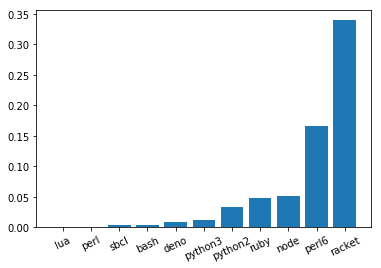

In [5]:
x = np.arange(len(data))
mp.bar(x, data["on_proc"])
mp.xticks(x, data.index, rotation=25)
mp.show()

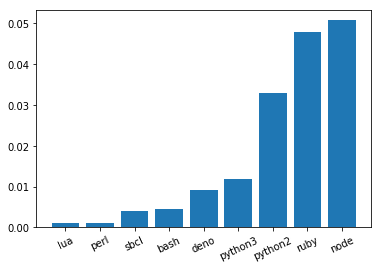

In [6]:
data2 = data[data["on_proc"] <= 0.15]
x2 = np.arange(len(data2))
mp.bar(x2, data2["on_proc"])
mp.xticks(x2, data2.index, rotation=25)
mp.show()